In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [45]:
df = pd.read_csv("Diwali Sales Data.csv", encoding = "unicode_escape") 
# to avoid encoding error,we are using unicode escape

In [46]:
df.shape

(11251, 15)

In [47]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [48]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [50]:
# by above, 13 and 14 has 0 entries, so we can just remove them
df.drop(["Status", "unnamed1"], axis = 1, inplace = True)  # inplace = True, saves the current line command
# axis=1 to select the column to delete and inplace = True to save and execute written on the same line

In [51]:
pd.isnull(df).sum()  # Amount has 12 Null values

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [52]:
df.dropna(inplace = True) # drops Na rows

In [53]:
df["Amount"] = df["Amount"].astype("int")  # Changing DataTypes
df["Amount"].dtypes

dtype('int64')

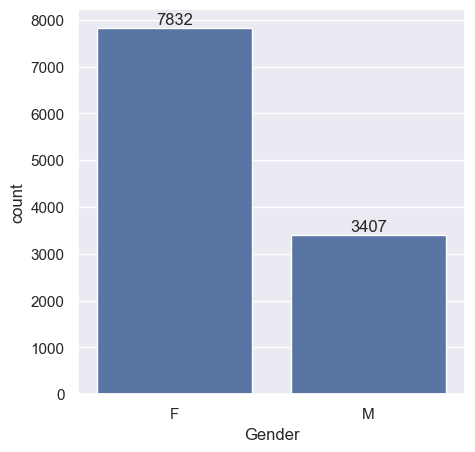

In [54]:
ax = sns.countplot(x = "Gender", data=df) #creates following graph

for bars in ax.containers: #this is for tat values above bar
    ax.bar_label(bars)

In [55]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

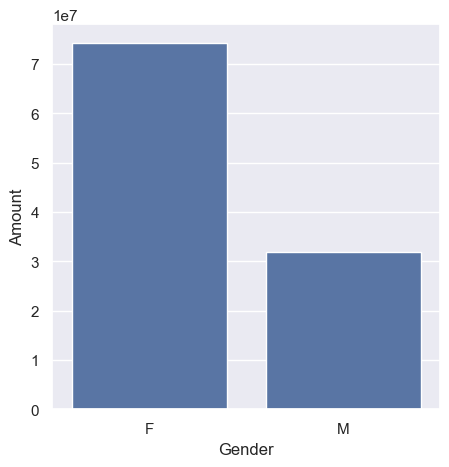

In [56]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
#[34] result stored in sales_gen

sns.barplot(x = 'Gender',y = 'Amount', data = sales_gen) 
#xAxis= gender, yAxis = Amount from dataFrame sales_gen

In [57]:
# FROM ABOVE 2 GRAPHS, MOST of the buyers are Femaels and also ahead in purchasing Power

In [58]:
#AGE

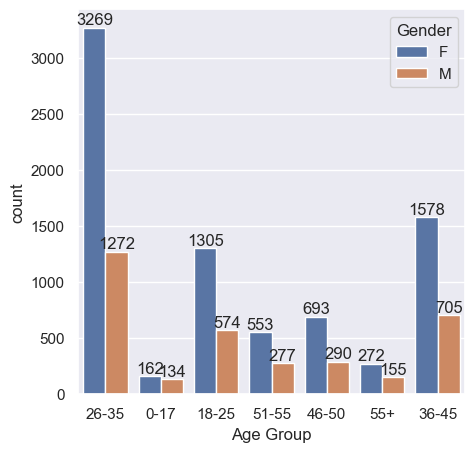

In [59]:
ax = sns.countplot(x = "Age Group", data=df,hue = 'Gender') #creates following graph
#this graph shows that the count of purchase accordng to age_group
# Hue = "gender", in perticular age_group, we are dividing it according to Gender

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

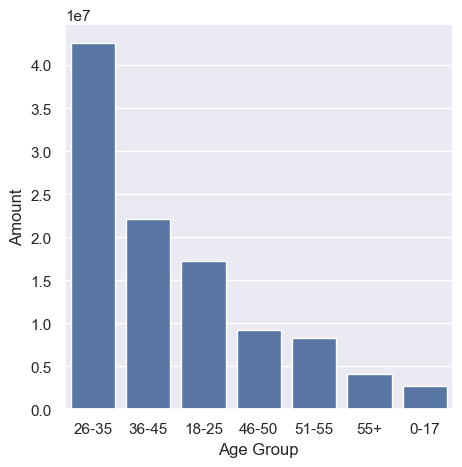

In [60]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
#[34] result stored in sales_age

sns.barplot(x = 'Age Group',y = 'Amount', data = sales_age) 
#xAxis= Age Group, yAxis = Amount from dataFrame sales_gen

In [61]:
#From above 2 graphs, most of purchasing is done by people at age 26-35 & Female

In [62]:
#STATE, total no. of orders according to states

<Axes: xlabel='State', ylabel='Orders'>

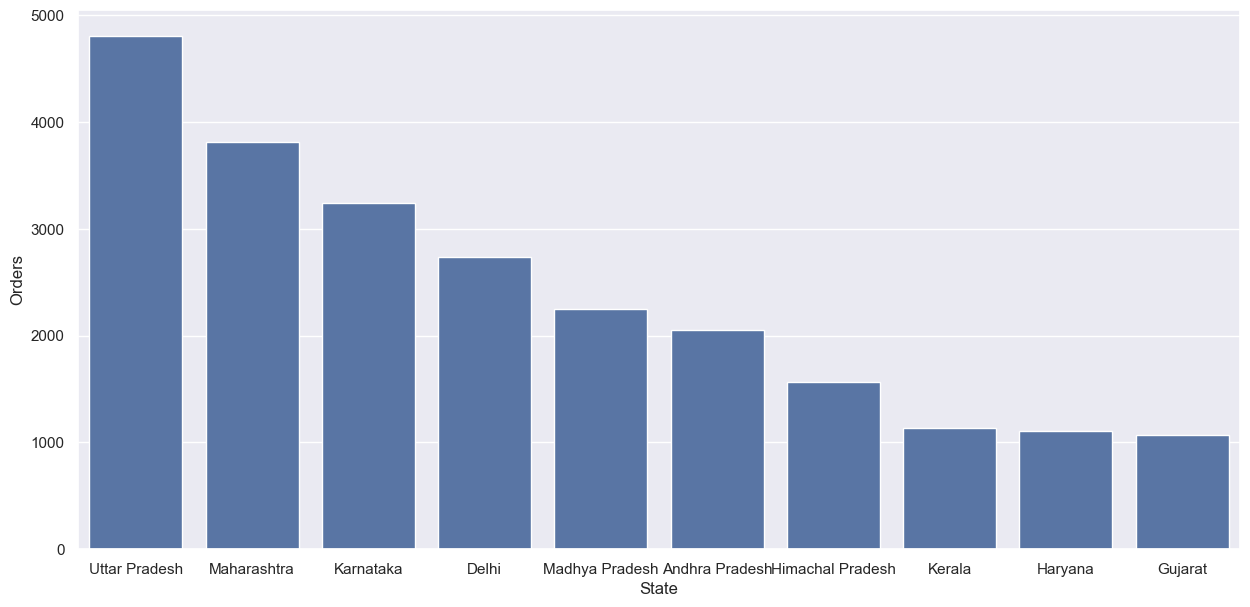

In [63]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
#[34] result stored in sales_state

sns.set(rc={"figure.figsize":(15,7)})  # changing width and ht, as states name was meging
sns.barplot(x = 'State',y = 'Orders', data = sales_state) 

<Axes: xlabel='State', ylabel='Amount'>

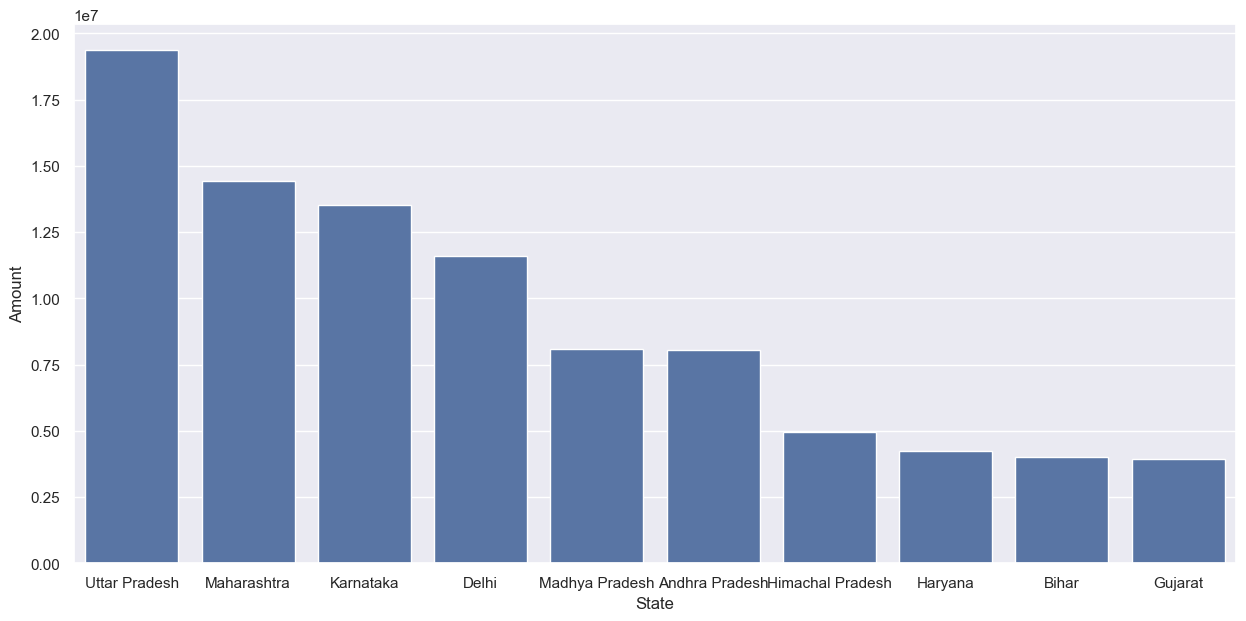

In [64]:
#repeating all the above, but now in terms of Amount

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
#[34] result stored in sales_state

sns.set(rc={"figure.figsize":(15,7)})  # changing width and ht, as states name was meging
sns.barplot(x = 'State',y = 'Amount', data = sales_state) 

In [65]:
 # most of the orders are from UP, MAH and Karnataka

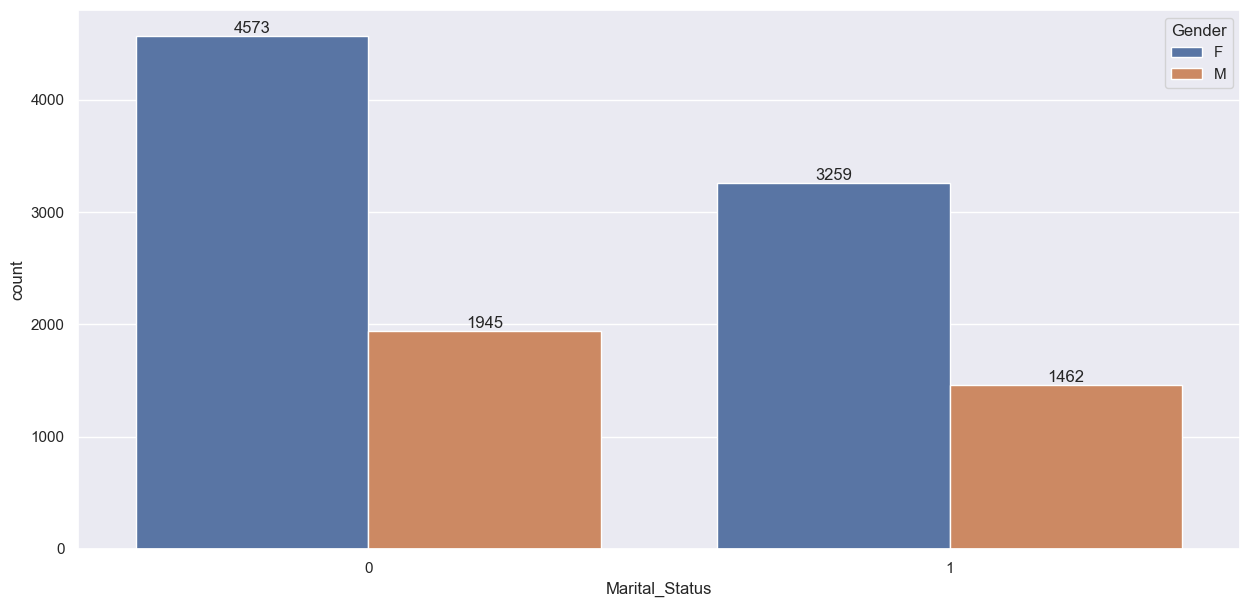

In [66]:
ax = sns.countplot(x = "Marital_Status", data=df,hue = 'Gender') #creates following graph
#this graph shows that the count of marital_ accordng to age_group
# Hue = "gender", in perticular age_group, we are dividing it according to Gender

sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

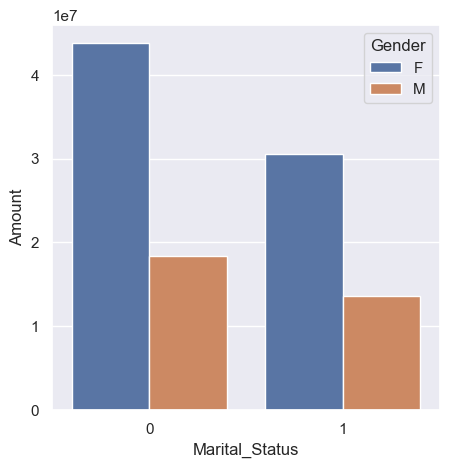

In [67]:
sales_state = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
#[34] result stored in sales_state

sns.set(rc={"figure.figsize":(5,5)})  # changing width and ht, as states name was meging
sns.barplot(x = 'Marital_Status',y = 'Amount', data = sales_state, hue="Gender") 

In [ ]:
# most buyers are married Women

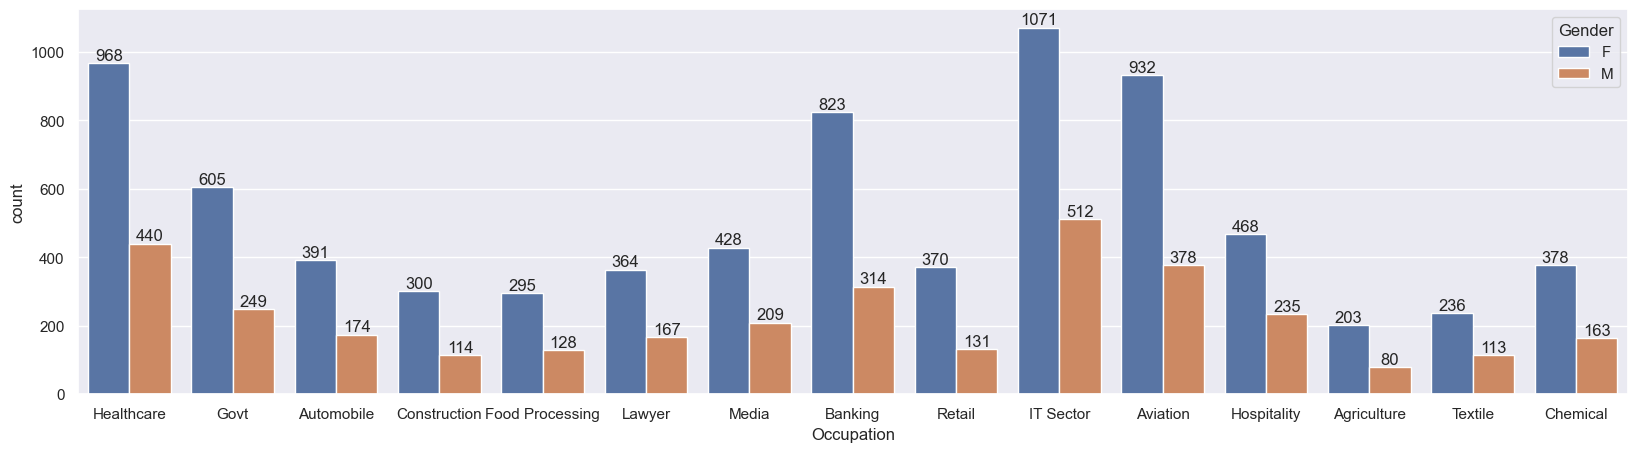

In [69]:
ax = sns.countplot(x = "Occupation", data=df,hue = 'Gender') #creates following graph


sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

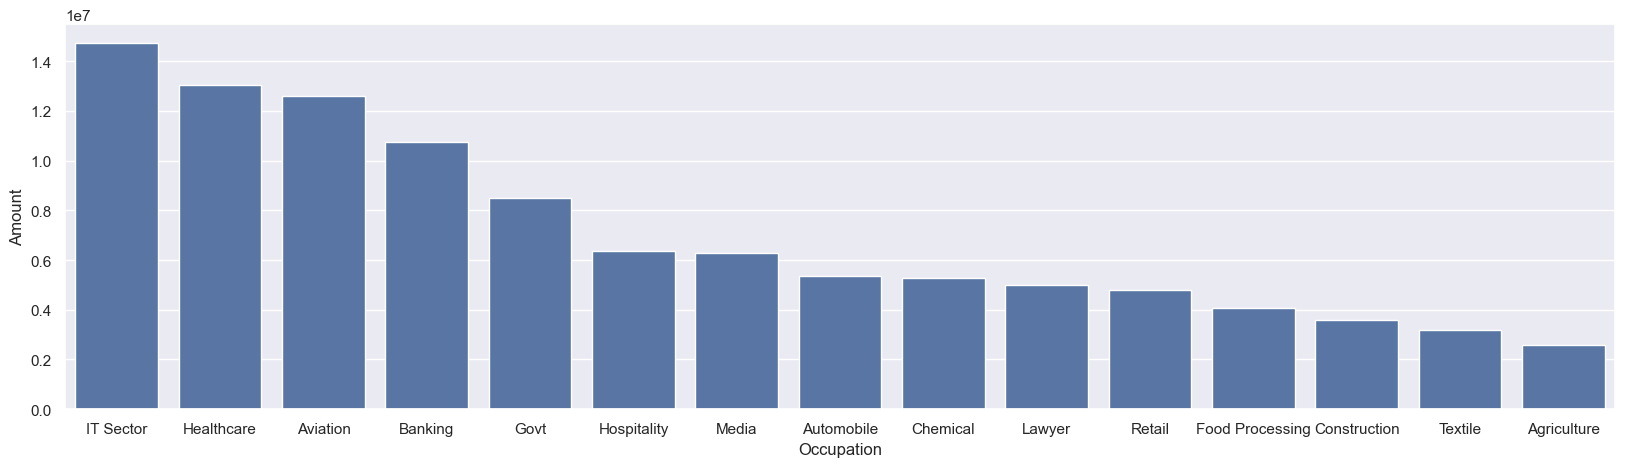

In [76]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
#[34] result stored in sales_state

sns.set(rc={"figure.figsize":(20,5)})  # changing width and ht, as states name was meging
sns.barplot(x = 'Occupation',y = 'Amount', data = sales_state) 

In [73]:
# From graph, IT has Most orders,placed by females

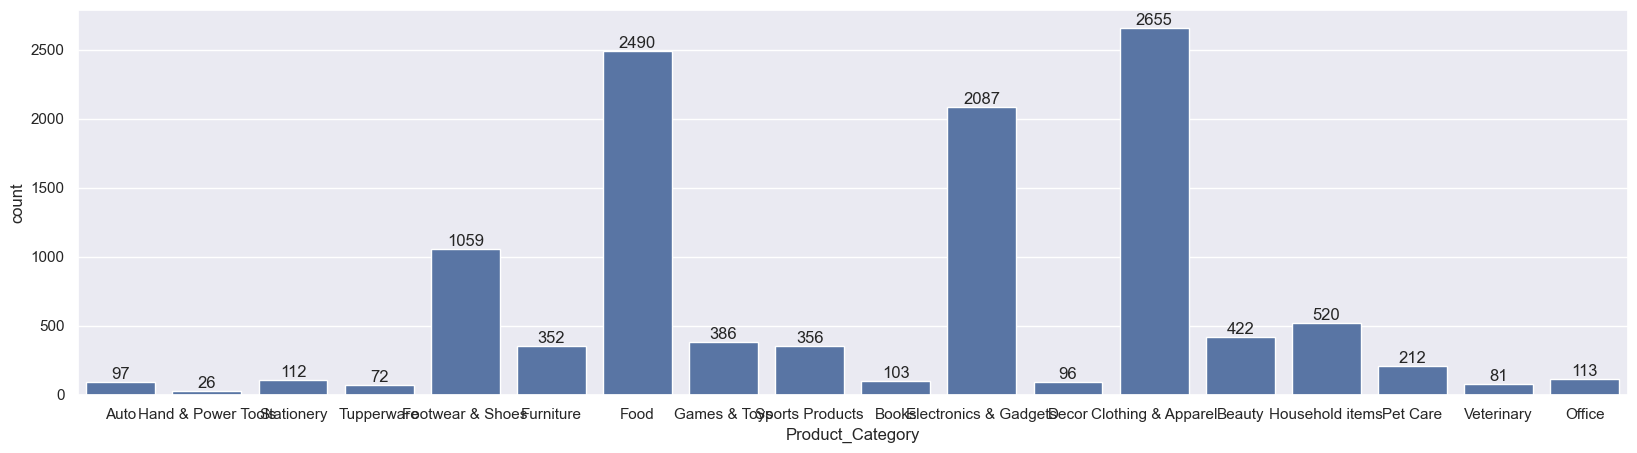

In [75]:
ax = sns.countplot(x = "Product_Category", data=df) #creates following graph


sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

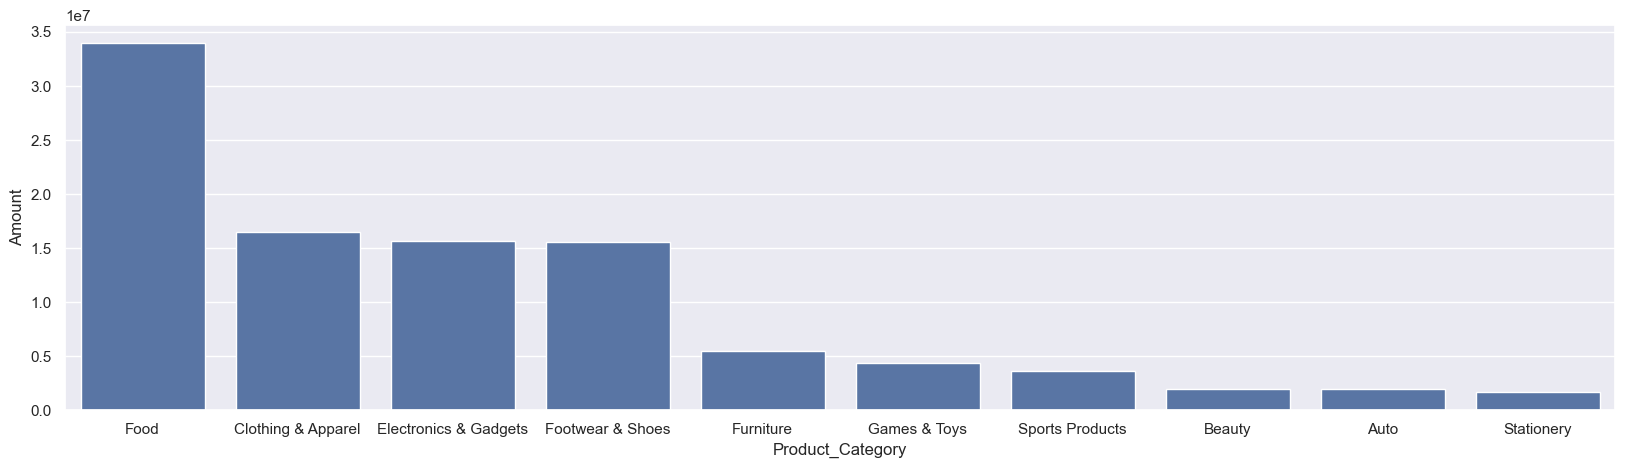

In [81]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
#[34] result stored in sales_state

sns.set(rc={"figure.figsize":(20,5)})  # changing width and ht, as states name was meging
sns.barplot(x = 'Product_Category',y = 'Amount', data = sales_state) 

In [80]:
#Moat sale is done for clothing, but most spendings are on FOOD

<Axes: xlabel='Product_ID', ylabel='Amount'>

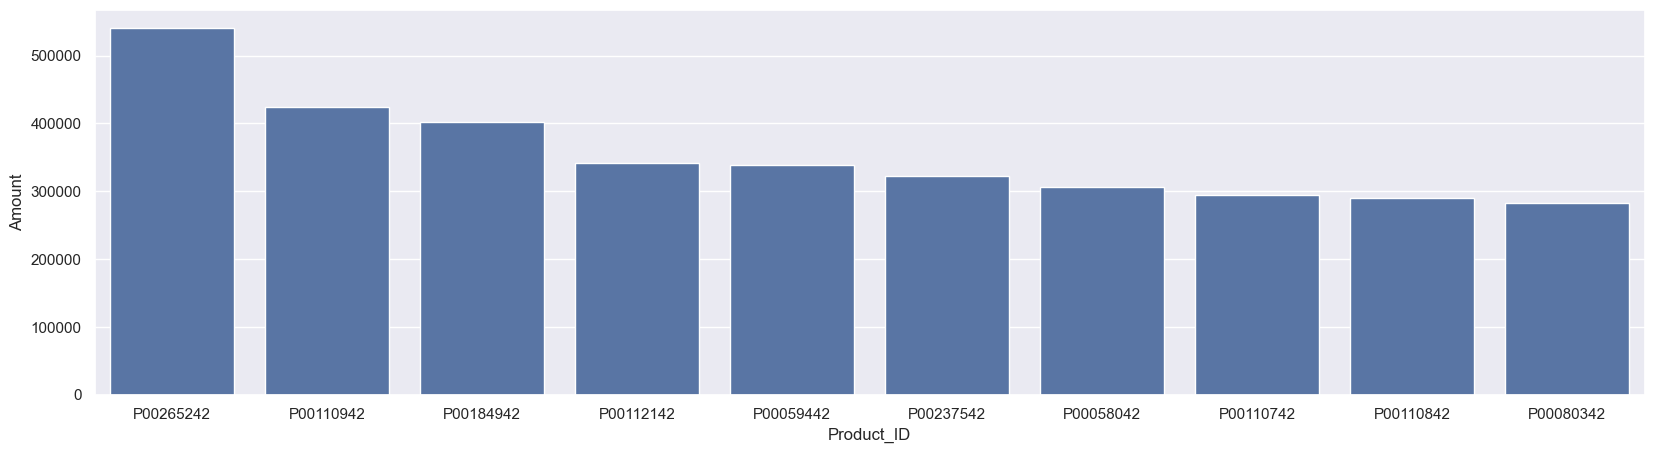

In [82]:
#Gives you top 10 products, amount wise spendings
sales_state = df.groupby(['Product_ID'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
#[34] result stored in sales_state

sns.set(rc={"figure.figsize":(20,5)})  # changing width and ht, as states name was meging
sns.barplot(x = 'Product_ID',y = 'Amount', data = sales_state) 

<Axes: xlabel='Product_ID'>

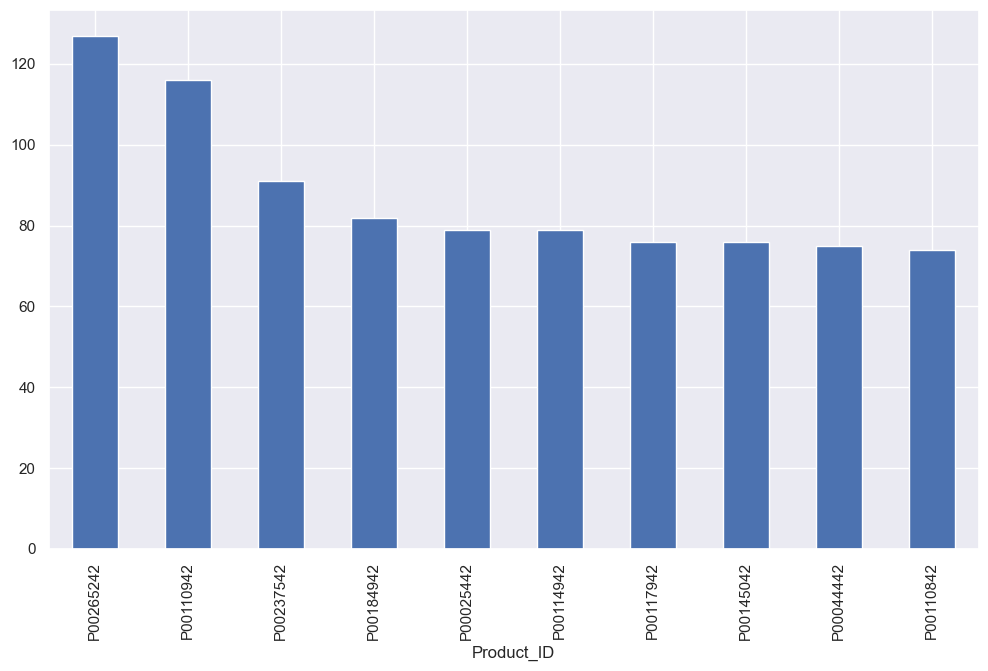

In [84]:
#same task aas above, but in different way
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby("Product_ID")["Orders"].sum().nlargest(10).sort_values(ascending=False).plot(kind="bar")

In [86]:
#CONCLUSION
# Married Women of Age_Group 26-35 yrs, belongs from UP,MAH,Karnataka, works at IT and Healthcare
# **Buys products from Food and Cloathing**